# Predicting diamonds prices 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


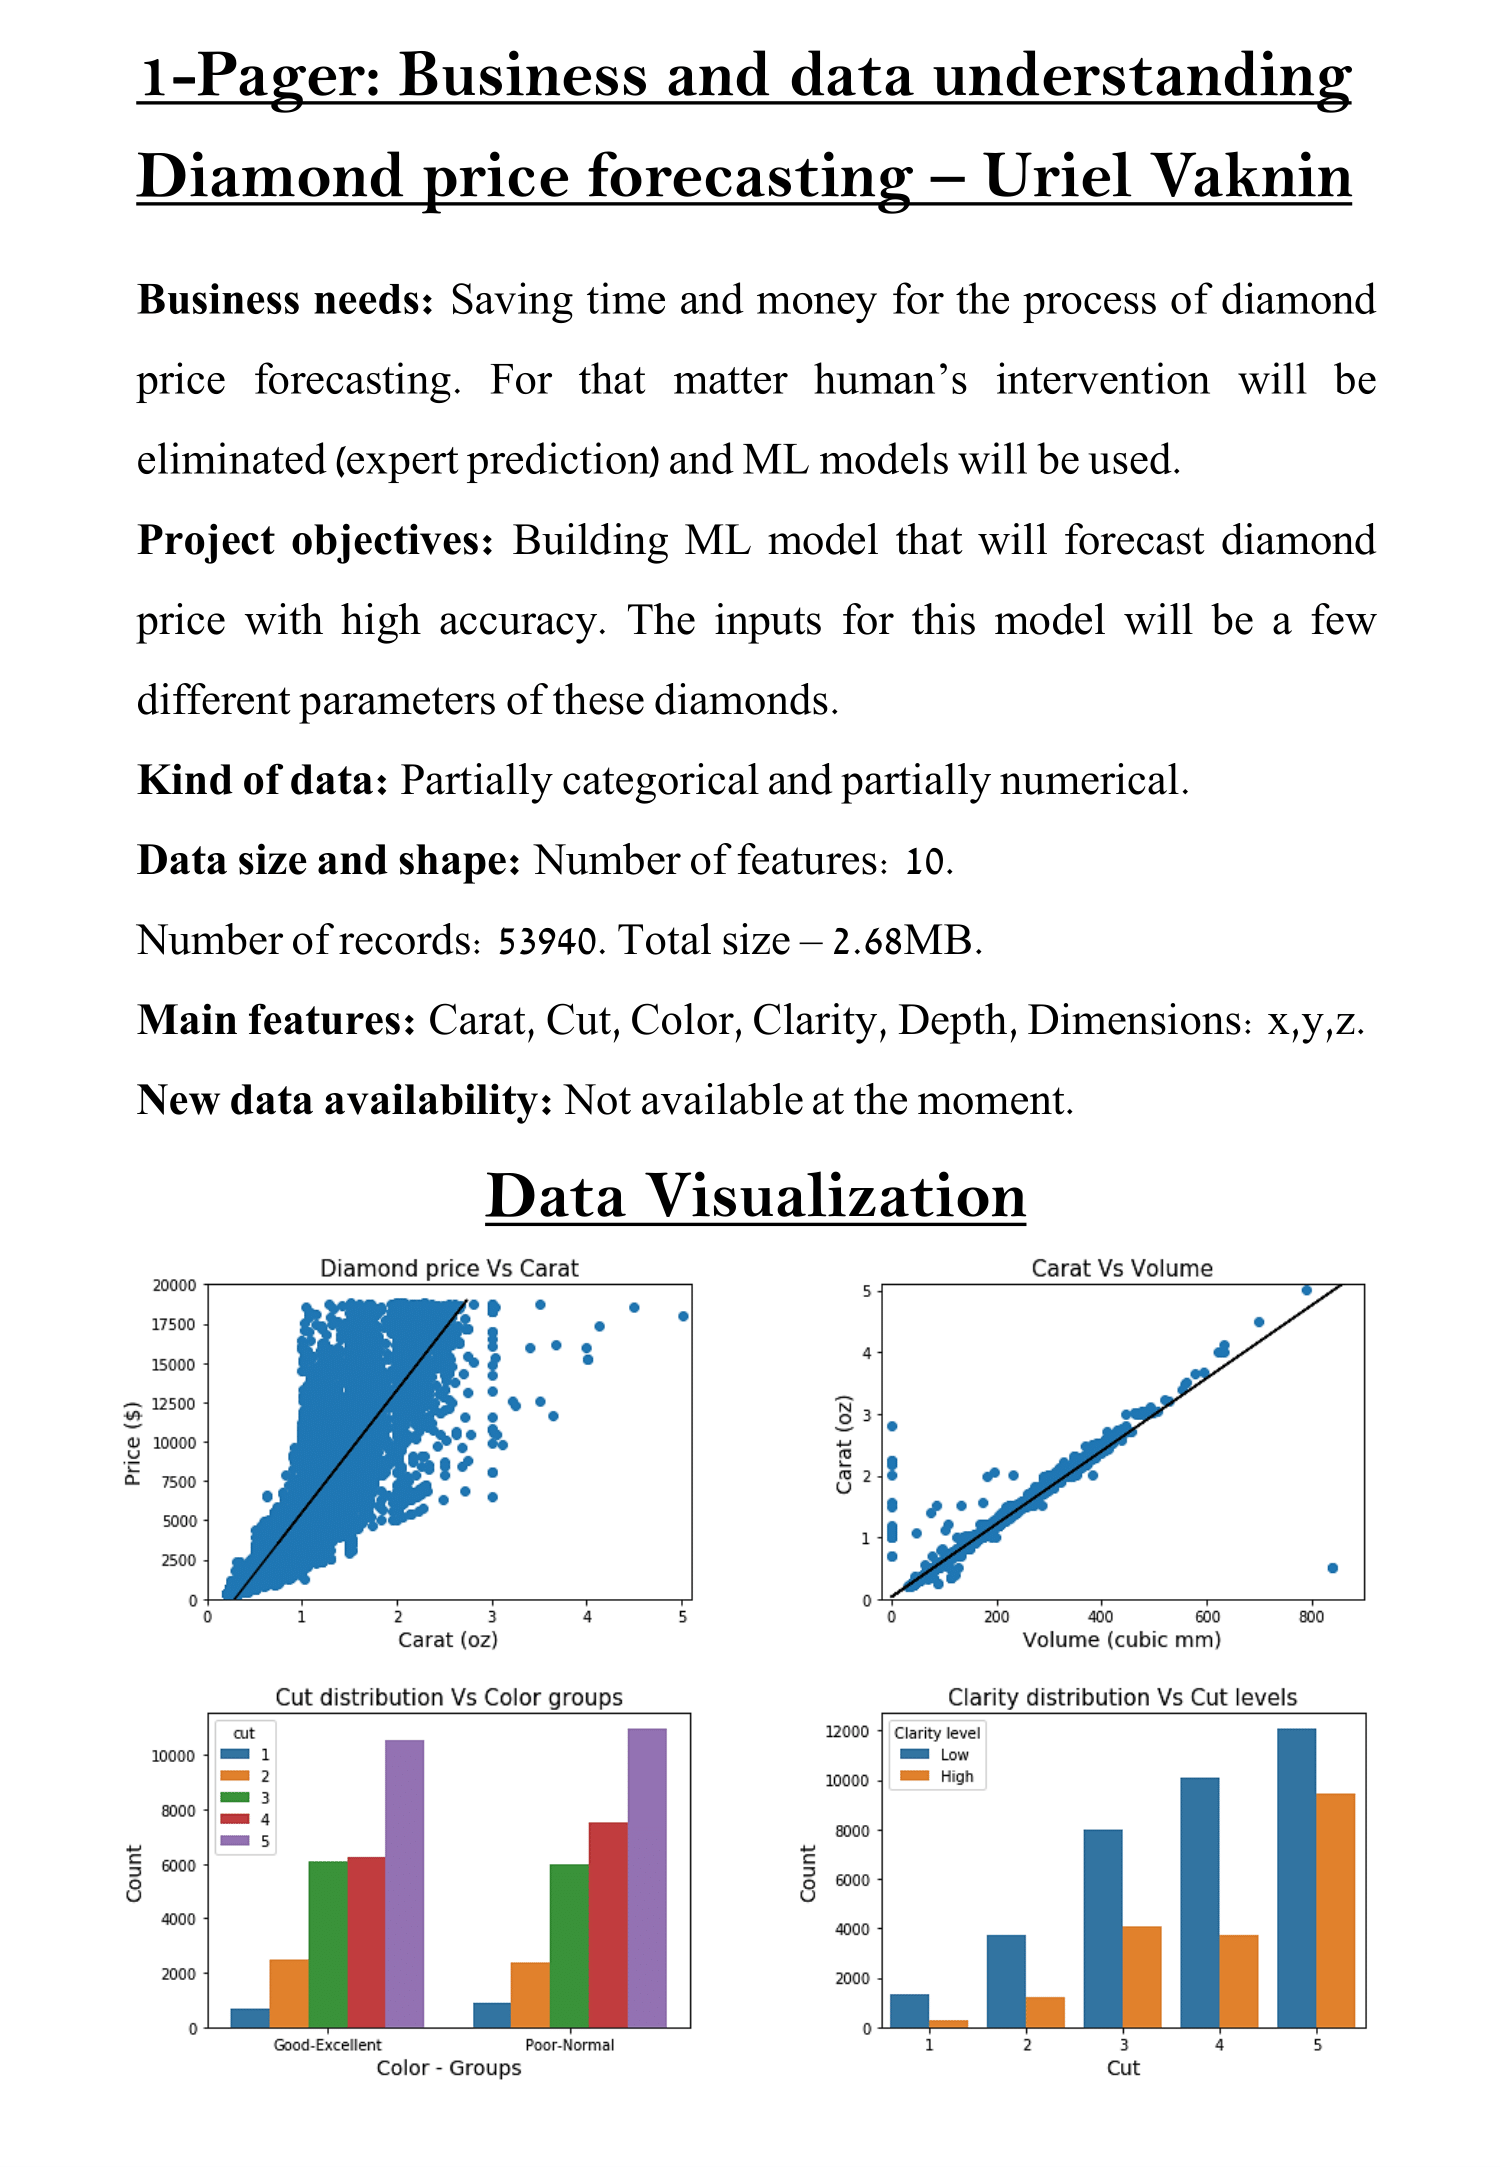

In [3]:
from IPython.display import Image
Image(filename='1_pager.png',width=800,height=1000)

In [4]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [5]:
diamonds.head(3)
#diamonds.info()
#diamonds.describe().T

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Data Visualization

In [6]:
price = diamonds.price
carat = diamonds.carat

Text(0, 0.5, 'Counts')

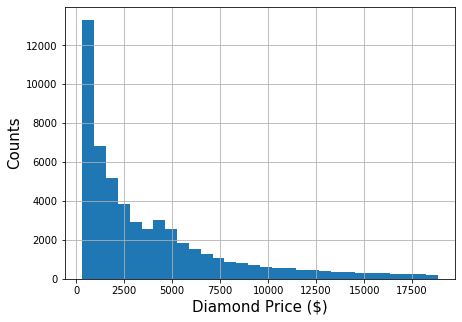

In [9]:
price.hist(bins=30, figsize=(7,5))
plt.xlabel('Diamond Price ($)',fontsize=15)
plt.ylabel('Counts',fontsize=15)

Text(0, 0.5, 'Counts')

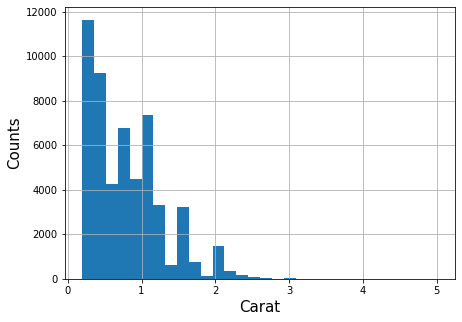

In [10]:
carat.hist(bins=30, figsize=(7,5))
plt.xlabel('Carat',fontsize=15)
plt.ylabel('Counts',fontsize=15)

In [14]:
# Let's take a look at the frequency of the categorical features
# The order is given according to the ranking of each level

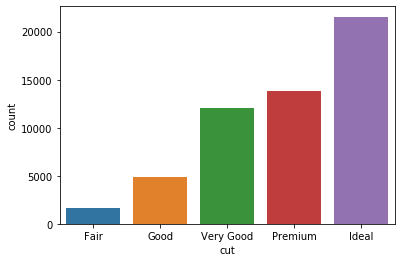

In [15]:
sns.countplot(x='cut',data=diamonds,order=['Fair','Good','Very Good','Premium','Ideal'])

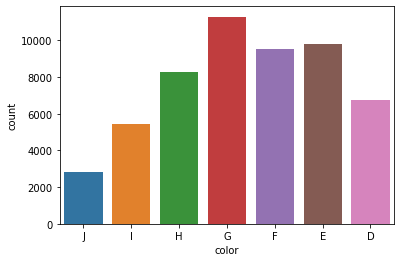

In [16]:
sns.countplot(x='color',data=diamonds,order = list('JIHGFED'))

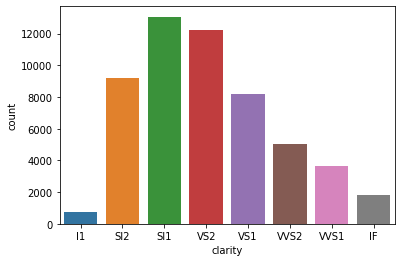

In [17]:
sns.countplot(x='clarity',data=diamonds, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

In [18]:
# Now we will check the correlation between different features

In [19]:
cm = diamonds.corr()
cm

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


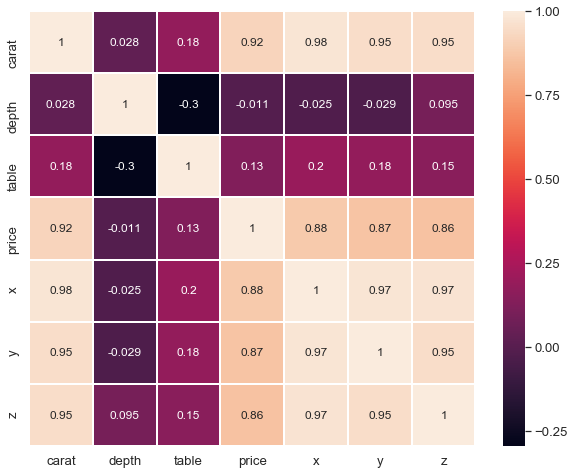

In [28]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(10,8))         
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, linewidths=1, ax=ax)

### Handling with categorical features

In [29]:
# Creating a new dataframe with dummy variables
diamonds1 = pd.get_dummies(diamonds,columns=['cut','clarity','color'],drop_first=True)

In [30]:
diamonds1.head(3)
#diamonds1.shape

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# Building the Models

### All types of Models 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model as skl
from sklearn import svm

### Function who calculates the score of each Model 

In [32]:
X = diamonds1.drop('price',axis=1)
y = diamonds1['price']

In [33]:
def model_score(X,y,model):
    global M
    if model == 'LR':
        model = skl.LinearRegression()
    elif model == 'DT': 
        model = DecisionTreeRegressor()
    elif model == 'RF':
        model = RandomForestRegressor()
    elif model == 'KNN':
        model = KNeighborsRegressor(n_neighbors=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    print(f" Test score:  {model.score(X_test,y_test)} \n Train score: {model.score(X_train,y_train)}")
    M = model
    return M

In [34]:
model_score(X,y,'LR')

 Test score:  0.9201575632035259 
 Train score: 0.9195846037738951


LinearRegression()

In [35]:
model_score(X,y,'DT')

 Test score:  0.9603449710878894 
 Train score: 0.9999957302834515


DecisionTreeRegressor()

In [93]:
model_score(X,y,'RF')

 Test score:  0.9757907612456858 
 Train score: 0.9964305760146958


RandomForestRegressor()

In [120]:
model_score(X,y,'KNN')

 Test score:  0.9249115731703803 
 Train score: 0.9777059717533026


KNeighborsRegressor(n_neighbors=2)

In [36]:
# KNN gives doesn't give the best results, since the features are not scales
# On the other hand, we have categorical features which can't be scaled easily 

### Dimensionality reduction

Here we try to see to what extent can we reduce the dimensinality (number of features)
and how it affects the final scores

1. Let's cluster x,y,z into 3 groups

In [39]:
df_xyz = diamonds[ ['x','y','z'] ]

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [41]:
kmeans.fit(df_xyz)

KMeans(n_clusters=3)

In [42]:
kmeans.cluster_centers_
#kmeans.labels_

array([[6.23262489, 6.23214453, 3.85186006],
       [4.6972521 , 4.70613611, 2.89958857],
       [7.57133791, 7.56801999, 4.66797377]])

2. We will add labels to this dataframe

In [43]:
df_xyz['xyz_labels'] = kmeans.labels_
df_xyz.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,z,xyz_labels
1,3.95,3.98,2.43,1
2,3.89,3.84,2.31,1
3,4.05,4.07,2.31,1


3. Using KNN model we can estimate how good was our clustering (labeling) process

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_xyz.drop('xyz_labels',axis=1),
                                                    df_xyz['xyz_labels'],test_size=0.33,random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn.score(X_train,y_train)

0.9994189103184925

In [48]:
knn.score(X_test,y_test)

0.9985394078984327

In [151]:
# Very high scores both on train and test set!

4. Replacing x,y,z feature with its labels

In [49]:
diamonds2 = diamonds.drop(['x','y','z'],axis=1)

In [50]:
diamonds2['xyz_labels'] = kmeans.labels_

In [51]:
diamonds2.head(3)

,carat,cut,color,clarity,depth,table,price,xyz_labels
1,0.23,Ideal,E,SI2,61.5,55.0,326,1
2,0.21,Premium,E,SI1,59.8,61.0,326,1
3,0.23,Good,E,VS1,56.9,65.0,327,1


5. Instead of dummy variables we will use labels encoding

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [53]:
df_encoded = diamonds2[ ['cut', 'color', 'clarity'] ].apply(le.fit_transform)

In [54]:
diamonds3 = pd.concat([df_encoded, diamonds2.drop(['color', 'cut', 'clarity'], axis=1)], axis=1)
diamonds3.head()

,cut,color,clarity,carat,depth,table,price,xyz_labels
1,2,1,3,0.23,61.5,55.0,326,1
2,3,1,2,0.21,59.8,61.0,326,1
3,1,1,4,0.23,56.9,65.0,327,1
4,3,5,5,0.29,62.4,58.0,334,1
5,1,6,3,0.31,63.3,58.0,335,1


#### We reduced from 24 features to only 8 features!

### Now let's see how the score is affectes from this dimensionality reduction

In [55]:
X = diamonds3.drop(['price'],axis=1)
y = diamonds3['price']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
model_score(X,y,'RF')

 Test score:  0.9803376077445441 
 Train score: 0.9970763031868942


RandomForestRegressor()

Observations - 
1. Our scores weren't affected att all
2. We've managed to reduced our dataset by 67% !!!

### The End (-: